#1. Load an Image:

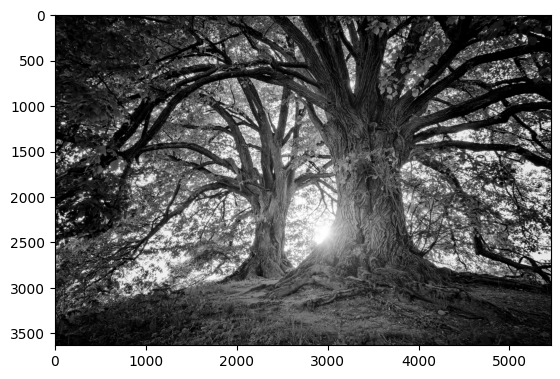

Image Shape: (3632, 5456)


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA

# Load the image
img = Image.open('image.jpg').convert('L')  # Convert to grayscale
img_array = np.array(img)
plt.imshow(img_array, cmap='gray')
plt.show()
print("Image Shape:", img_array.shape)

#2. Reshape the Image:

In [2]:
# Reshape the image into a 2D matrix
reshaped_img = img_array.reshape(-1, img_array.shape[1])
print("Reshaped Image Shape:", reshaped_img.shape)

Reshaped Image Shape: (3632, 5456)


#3. Apply PCA:



In [3]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=50)
compressed_img = pca.fit_transform(reshaped_img)
print("Compressed Image Shape:", compressed_img.shape)

Compressed Image Shape: (3632, 50)


#4. Reconstruction:



In [4]:
# Reconstruct the image using inverse transform
reconstructed_img = pca.inverse_transform(compressed_img)
reconstructed_img = reconstructed_img.reshape(img_array.shape)

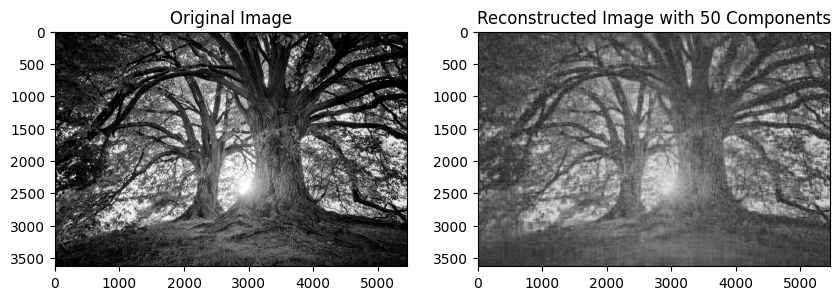

In [5]:
# Plot the original and reconstructed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_array, cmap='gray')

plt.subplot(1,2,2)
plt.title('Reconstructed Image with 50 Components')
plt.imshow(reconstructed_img, cmap='gray')
plt.show()


#5. Visualize Results:



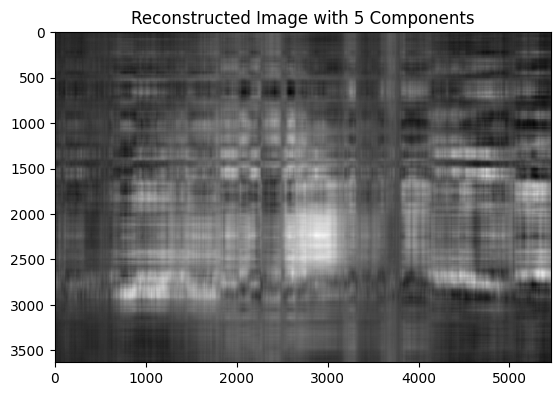

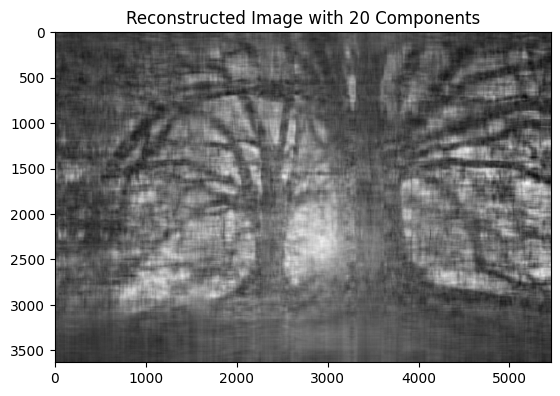

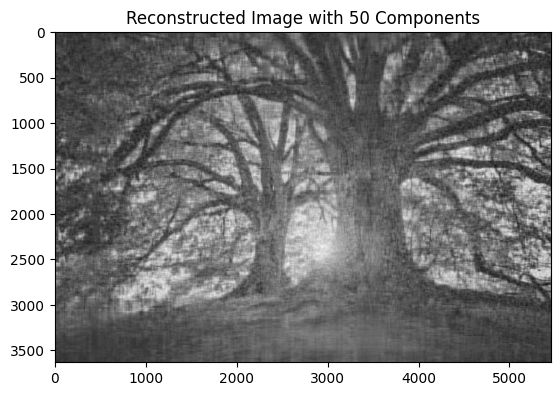

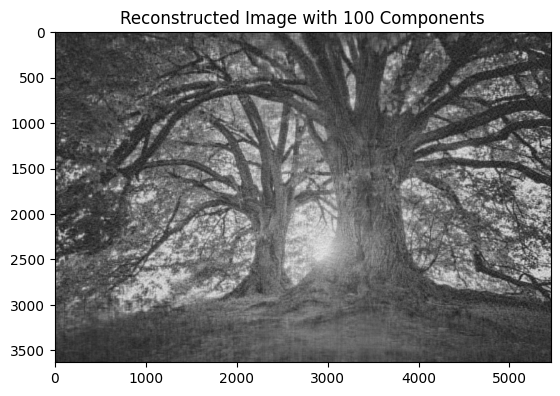

In [6]:
# You can experiment with different number of components for reconstruction
for n_components in [5, 20, 50, 100]:
    pca = PCA(n_components=n_components)
    compressed_img = pca.fit_transform(reshaped_img)
    reconstructed_img = pca.inverse_transform(compressed_img)
    reconstructed_img = reconstructed_img.reshape(img_array.shape)

    plt.figure()
    plt.title(f'Reconstructed Image with {n_components} Components')
    plt.imshow(reconstructed_img, cmap='gray')
    plt.show()